In [17]:
#Importación de librerias y módulos
from pandas import read_csv, crosstab, DataFrame
from numpy import asarray, unique
#from skimage import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from seaborn import heatmap
import matplotlib.pyplot as plt
from random import sample

In [18]:
# Leer el archivo
data = read_csv(
    'C:/Users/conte/OneDrive/Escritorio/Colegio Bourbaki/Perceptron/Ejercicio/digitos_7.csv')
print(data)
print('\n')

         0    1    2    3    4    5    6    7    8    9  ...  775  776  777  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
69995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
69999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       778  779  780  781  782  783  clase7  
0    

In [19]:
# Definicion de X e Y
Y = data['clase7'].astype('int')
X = asarray(data.drop(columns=['clase7']))

In [20]:
# Crear subconjunto entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,
                                                    shuffle=True, 
                                                    random_state=0)

In [21]:
#¿Cómo son los conjuntos de entrenamiento y prueba?
print("Training set")
print("X: ", X_train.shape)
print("Y: ", y_train.shape)
unique1, counts = unique(y_train, return_counts=True)
print('False:   ', counts[0], '\nTrue:    ', counts[1], '\n')


print("Test set")
print("X: ", X_test.shape)
print("Y: ", y_test.shape)
unique1, counts = unique(y_test, return_counts=True)
print('False:   ', counts[0], '\nTrue:    ', counts[1], '\n')

Training set
X:  (49000, 784)
Y:  (49000,)
False:    43896 
True:     5104 

Test set
X:  (21000, 784)
Y:  (21000,)
False:    18811 
True:     2189 



In [22]:
# Perceptron
model = Perceptron(max_iter=46, random_state=0, verbose=True)
model.fit(X_train, y_train)
print('\n')
print("Iterations: ", model.n_iter_)
print(model.coef_.shape)
print(model.intercept_)

-- Epoch 1
Norm: 32451.24, NNZs: 598, Bias: -30.000000, T: 49000, Avg. loss: 60672.683327
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 40777.81, NNZs: 610, Bias: -45.000000, T: 98000, Avg. loss: 57076.201143
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 44807.05, NNZs: 613, Bias: -58.000000, T: 147000, Avg. loss: 56962.530796
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 48815.60, NNZs: 619, Bias: -76.000000, T: 196000, Avg. loss: 55632.362571
Total training time: 0.23 seconds.
-- Epoch 5
Norm: 51378.07, NNZs: 624, Bias: -84.000000, T: 245000, Avg. loss: 54718.620041
Total training time: 0.28 seconds.
-- Epoch 6
Norm: 55214.04, NNZs: 623, Bias: -102.000000, T: 294000, Avg. loss: 56034.570000
Total training time: 0.34 seconds.
-- Epoch 7
Norm: 56770.29, NNZs: 628, Bias: -111.000000, T: 343000, Avg. loss: 55676.280245
Total training time: 0.40 seconds.
-- Epoch 8
Norm: 59892.27, NNZs: 633, Bias: -130.000000, T: 392000, Avg. loss: 56467.341551
Total training time: 0.45 

In [23]:
#Predicción del modelo
y_predict = model.predict(X_test)
print("\nAccuracy: %.2f%%" % (accuracy_score(y_test, y_predict)*100))
print("Precisión conjunto entrenamiento: %.2f%%" %
      (model.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" %
      (model.score(X_test, y_test)*100.0))


Accuracy: 97.69%
Precisión conjunto entrenamiento: 98.09%
Precisión conjunto prueba: 97.69%


In [24]:
# Perceptron con margen alpha=0.0001
model2 = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2',  alpha=0.0001)
model2.fit(X_train, y_train)
print('\nalpha=0.0001')
print("Precisión conjunto entrenamiento: %.2f%%" %
      (model2.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" %
      (model2.score(X_test, y_test)*100.0))


alpha=0.0001
Precisión conjunto entrenamiento: 97.84%
Precisión conjunto prueba: 97.66%


In [25]:
# alpha=0.000005
model3 = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000005)

model3.fit(X_train, y_train)
print('\nalpha=0.000005')
print("Precisión conjunto entrenamiento: %.2f%%" %
      (model3.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" %
      (model3.score(X_test, y_test)*100.0))


alpha=0.000005
Precisión conjunto entrenamiento: 97.83%
Precisión conjunto prueba: 97.48%


In [26]:
# alpha=0.000001
model4 = Perceptron(max_iter=1000,  random_state=0, verbose=False,
                    penalty='l2', alpha=0.000001)
model4.fit(X_train, y_train)
print('\nalpha=0.000001')
print("Precisión conjunto entrenamiento: %.2f%%" %
      (model4.score(X_train, y_train)*100.0))
print("Precisión conjunto prueba: %.2f%%" %
      (model4.score(X_test, y_test)*100.0))



alpha=0.000001
Precisión conjunto entrenamiento: 98.03%
Precisión conjunto prueba: 97.72%


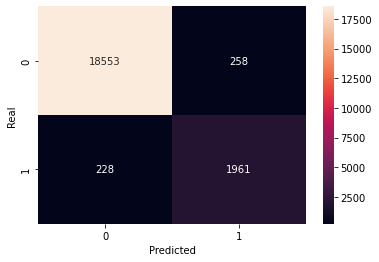

In [27]:
# Matriz Confusion
matriz = {'Y_Real':  y_test,
          'Y_Prediccion': y_predict
          }

df = DataFrame(matriz, columns=['Y_Real', 'Y_Prediccion'])
confusion_matrix = crosstab(df['Y_Real'], df['Y_Prediccion'], rownames=[
                            'Real'], colnames=['Predicted'])

heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()


 False    62707
True      7293
Name: clase7, dtype: int64
(70000, 785)
70000 (28, 28)


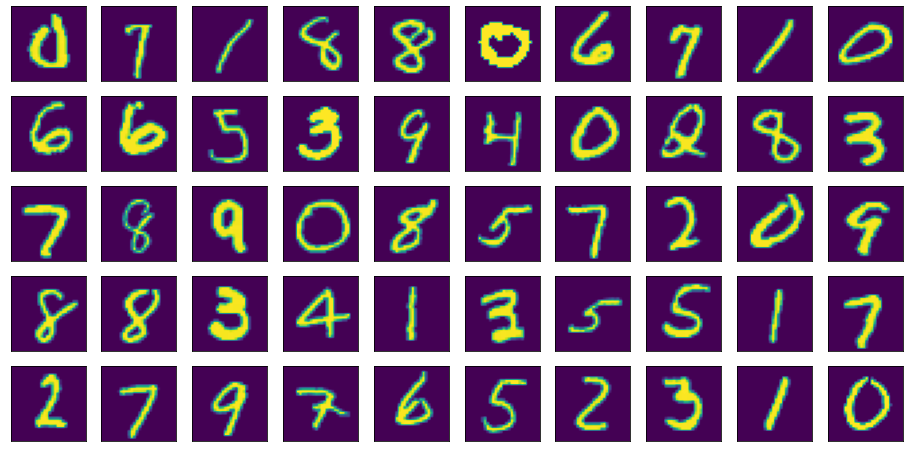

In [28]:
# Unstack para graficar
print('\n',data['clase7'].value_counts(sort=False))
print(data.shape)
data_reshape = list(X.reshape(70000, 28, 28))
print(len(data_reshape), data_reshape[0].shape)

data_random = sample(data_reshape, 50)

fig = plt.figure(figsize=(16, 8))
columns = 10
rows = 5
for i in range(0, columns * rows):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(data_random[i])
    plt.xticks([])
    plt.yticks([])
